In [1]:
import csv
import random

data_rows=[
    ["ID","Name","Score"],
    ["1", "Alice", "85"],
    ["2", "Bob", "90"],
    ["3", "Charlie", "78"],
    ["4", "David", "92"],
    ["5", "Eva", "88"],
    ["1", "Alice", "85"],
    ["6", "Frank", ""],
    ["7","Eve","invalid"]
]

with open("raw_data.csv","w",newline="") as f:
    writer=csv.writer(f)
    writer.writerows(data_rows)

expense_rows=[
    ["Date","Category","Amount","Description"],
    ["2023-01-01", "Food", "15.50", "Lunch"],
    ["2023-01-05", "Rent", "1200.00", "Monthly Rent"],
    ["2023-01-07", "Food", "45.00", "Groceries"],
    ["2023-01-10", "Transport", "20.00", "Gas"],
    ["2023-01-15", "Food", "12.00", "Coffee"],
    ["2023-01-20", "Transport", "35.00", "Uber"],
    ["2023-02-01", "Rent", "1200.00", "Monthly Rent"],
]

with open("expenses.csv","w",newline="") as f:
    writer=csv.writer(f)
    writer.writerows(expense_rows)

print("Files 'raw_data.csv' and 'expenses.csv' created successfully!")

Files 'raw_data.csv' and 'expenses.csv' created successfully!


In [2]:
import csv
import os

def process_data(file_path):
    seen_ids=set()
    valid_scores=[]
    print(f"--- Processing file: {file_path} ---")
    try:
        with open(file_path,mode='r')as f:
            reader=csv.DictReader(f)

            for row in reader:
                user_id=row['ID']
                score_str=row['Score']
                if user_id in seen_ids:
                    print(f"Skipping duplicate ID: {user_id}")
                    continue
                seen_ids.add(user_id) 

                if not score_str:
                    print(f"Missing score for ID: {user_id}")
                    continue
                try:
                    score=float(score_str)
                    valid_scores.append(score) 
                except ValueError:
                    print(f"Invalid score '{score_str}' for ID: {user_id}")

            if valid_scores:
                avg_score= sum(valid_scores)/len(valid_scores)
                print("-"*30)
                print(f"Total Valid Records:{len(valid_scores)}")
                print(f"Average Score:{avg_score:.2f}") 
            else:
               print("No valid scores found.")          

    except FileNotFoundError:
        print("Error: the file not found.")
if __name__=="__main__":
    process_data("raw_data.csv")                            
                          

--- Processing file: raw_data.csv ---
Skipping duplicate ID: 1
Missing score for ID: 6
Invalid score 'invalid' for ID: 7
------------------------------
Total Valid Records:5
Average Score:86.60


--- Analyzing expenses.csv ---

Expense Summary by Category:
Category
Food           72.5
Rent         2400.0
Transport      55.0
Name: Amount, dtype: float64


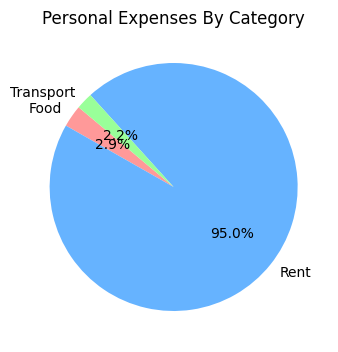

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt


def analyze_expenses(file_path):
    print(f"--- Analyzing {file_path} ---")

    try:
        df=pd.read_csv(file_path)
        df['Date']=pd.to_datetime(df['Date'])
        df['Amount'] = pd.to_numeric(df['Amount'],errors='coerce')
        df.dropna(subset=['Amount'],inplace=True)
        category_summary=df.groupby('Category')['Amount'].sum()
        print("\nExpense Summary by Category:")
        print(category_summary)
        plt.figure(figsize=(4,8))
        category_summary.plot(
            kind='pie',
            autopct='%1.1f%%',
            startangle=140,
            colors=['#ff9999','#66b3ff','#99ff99']
        )
        plt.title('Personal Expenses By Category')
        plt.ylabel('Amount')
        plt.show()

    except FileNotFoundError:
        print("Error: the file not found.") 

if __name__=="__main__":
    analyze_expenses("expenses.csv")        


